## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

dataset = pd.read_csv("titanic.csv")
sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [39]:
print("Основна статистична інформація про числові змінні")
print(dataset.describe())
print("\nРозмір датасету")
print(dataset.shape)
print("\nТип змінних і кількість данних по кожній змінній")
print(dataset.info())

Основна статистична інформація про числові змінні
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Розмір датасету
(891, 12)

Тип

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [40]:
missing = dataset.isnull().sum()
print(missing)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:
В Age пропущено 177 атрибутів
В Cabin пропущено 687 атрибутів
В Embarked пропущено 2 атрибута

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



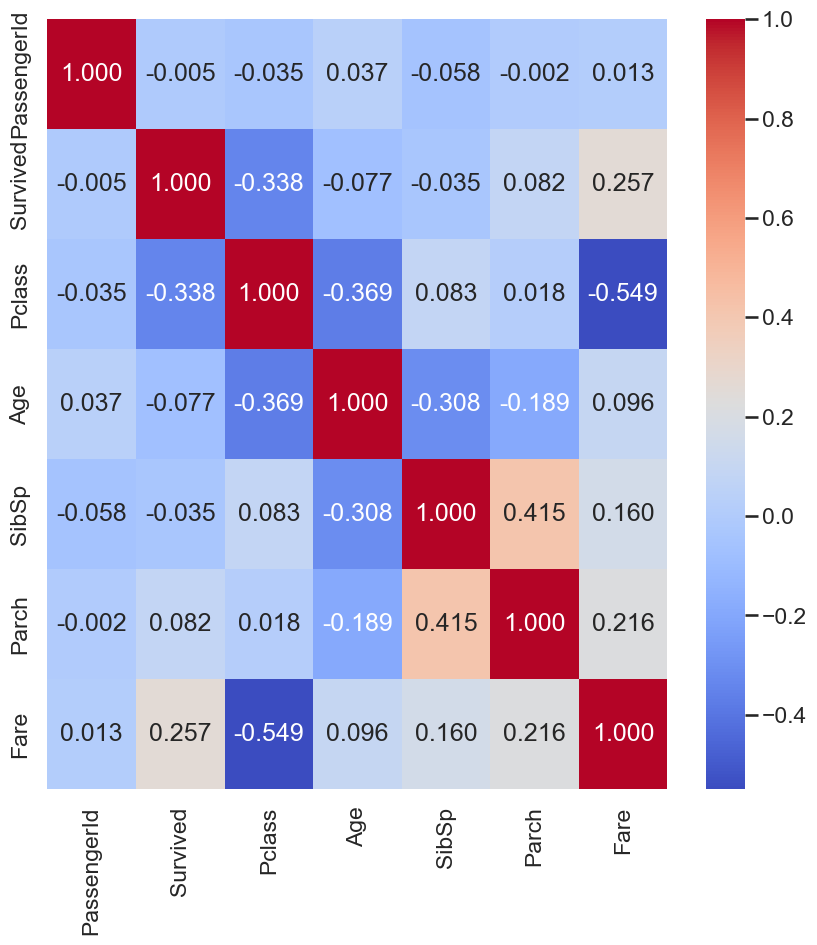

In [41]:
number = dataset.select_dtypes(include=['float','int'])
pearson = number.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(pearson, annot=True, cmap='coolwarm', fmt="0.3f")
plt.show()

Ваші висновки:
Значення яке наближине до 0 вказує відсутність кореляції між змінними
Значення яке наближине до 1 вказує на позитивну кореляцію між змінними
Значення яке наближине до -1 вказує на негативну кореляцію між змінними

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [42]:
def missing_group(ds, column, group_column):
    ds[column] = ds.groupby(group_column)[column].transform(lambda x: x.fillna(x.median()))
    return ds

fields = missing_group(dataset, 'Age', ['Pclass', 'Sex'])
missing = fields.isnull().sum()
print(missing)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:
Змінено пропущені значення Age тому що значення в цьому атрибуті мало сильний вплив на відсоток виживання для інших атрибутів

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





C:\Users\werti\AppData\Local\Temp\ipykernel_15396\2664956917.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sur_age_bin = dataset.groupby(['Age_bin', 'Survived']).size().unstack(fill_value=0)


<Figure size 800x600 with 0 Axes>

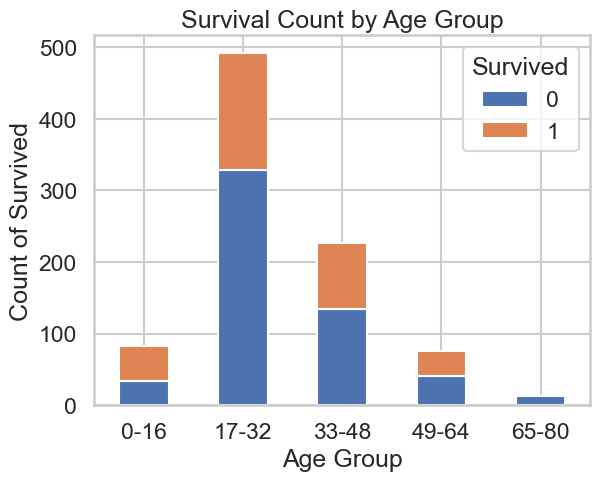

In [43]:
age_bins = [0, 16, 32, 48, 64, 80]
labels = ['0-16', '17-32', '33-48', '49-64', '65-80']
dataset['Age_bin'] = pd.cut(dataset['Age'], bins=age_bins, labels=labels, right=False)

plt.figure(figsize=(8, 6))
sur_age_bin = dataset.groupby(['Age_bin', 'Survived']).size().unstack(fill_value=0)
sur_age_bin.plot(kind='bar', stacked=True)
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Survived')
plt.xticks(rotation=0)
plt.legend(title='Survived', loc='upper right')
plt.show()

Ваші висновки:
на даному графіку робиться висновок, що від 17 до 32 років найбільший процент виживання і смерті серед всіх. А з віком від 65 до 80 років виживших немає.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

Chi2: 80.17393102947467
P_value: 2.816616687453629e-17


C:\Users\werti\AppData\Local\Temp\ipykernel_15396\3554213986.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sur_fare_bin = dataset.groupby('Fare_bin')['Survived'].value_counts().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

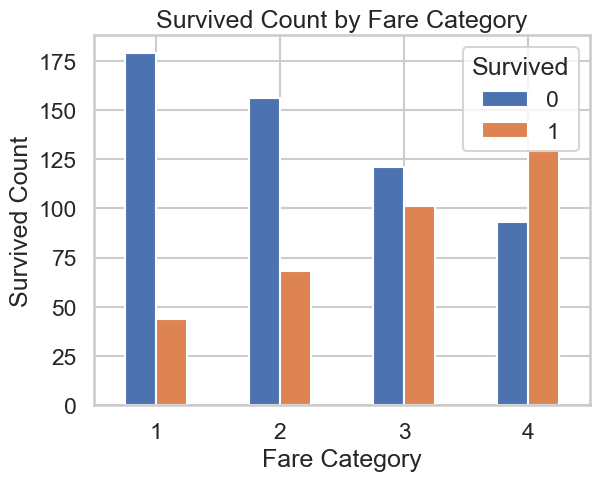

In [44]:
dataset['Fare_bin'] = pd.qcut(dataset['Fare'], q=4, labels=['1', '2', '3', '4'])

fare_survival_cross_tab = pd.crosstab(dataset['Fare_bin'], dataset['Survived'])
chi2, p_value, _, _ = chi2_contingency(fare_survival_cross_tab)
print("Chi2:", chi2)
print("P_value:", p_value)

plt.figure(figsize=(12, 8))
sur_fare_bin = dataset.groupby('Fare_bin')['Survived'].value_counts().unstack(fill_value=0)
sur_fare_bin.plot(kind='bar')
plt.xlabel('Fare Category')
plt.ylabel('Survived Count')
plt.title('Survived Count by Fare Category')
plt.xticks(rotation=0)
plt.show()

Ваші висновки:
Результати критерію Хі-квадрат показали, що є набагато важливіша залежність мід вартістю квитка та виживанням пасажира.

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [45]:
dataset['Family_size'] = dataset['Parch'] + dataset['SibSp']
dataset['Alone'] = (dataset['Family_size'] == 0).astype(int)
pd.set_option('display.max_rows', None)
print(dataset[['Family_size', 'Alone']])

     Family_size  Alone
0              1      0
1              1      0
2              0      1
3              1      0
4              0      1
5              0      1
6              0      1
7              4      0
8              2      0
9              1      0
10             2      0
11             0      1
12             0      1
13             6      0
14             0      1
15             0      1
16             5      0
17             0      1
18             1      0
19             0      1
20             0      1
21             0      1
22             0      1
23             0      1
24             4      0
25             6      0
26             0      1
27             5      0
28             0      1
29             0      1
30             0      1
31             1      0
32             0      1
33             0      1
34             1      0
35             1      0
36             0      1
37             0      1
38             2      0
39             1      0
40             1

Ваші висновки:
Створенно дві нові змінні в яких як ми можемо замітити якщо Family_size=1 то Alone=0 ну і навпаки.

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [46]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
dataset = dataset.drop(columns_to_drop, axis=1)

Ваші висновки:
Видалили колонки які є Нерелевантними окрім Cabin тому що ця колонка містить багато пустих значень

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [47]:
dataset = pd.read_csv("titanic.csv")

dataset["Title"] = dataset["Name"].apply(lambda name: name.split(".")[0].split(",")[-1].strip())

titles_map = {title: ind for ind, title in enumerate(dataset['Title'].unique())}
sex_map = {"female": 1, "male": 0}
embarked_map = {"S": 1, "Q": 2, "C": 3}

dataset["Title"] = dataset["Title"].map(titles_map)
dataset["Sex"] = dataset["Sex"].map(sex_map)
dataset["Embarked"] = dataset["Embarked"].map(embarked_map)

print("Sex:", dataset['Sex'].unique())
print("Embarked:", dataset['Embarked'].unique())
print("Title:", dataset['Title'].unique())

Sex: [0 1]
Embarked: [ 1.  3.  2. nan]
Title: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


Ваші висновки:
Ми перетворили змінні Sex, Embarked, Title в числові значення

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



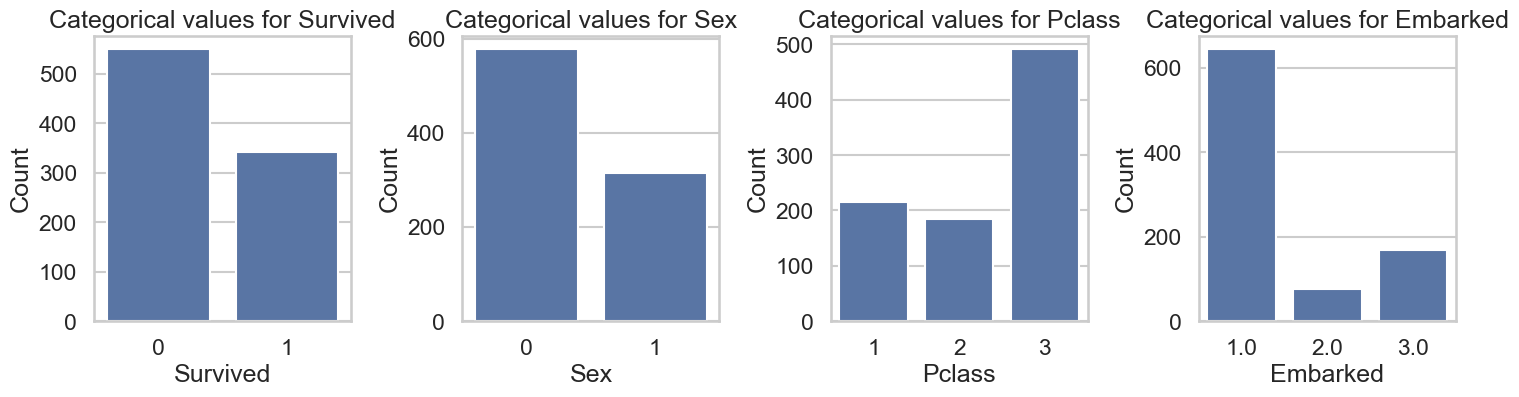

Дані за категорією 'Survived':
0 = 549
1 = 342

Дані за категорією 'Sex':
0 = 577
1 = 314

Дані за категорією 'Pclass':
3 = 491
1 = 216
2 = 184

Дані за категорією 'Embarked':
1.0 = 644
3.0 = 168
2.0 = 77



In [48]:
categorical = ['Survived', 'Sex', 'Pclass', 'Embarked']
plt.figure(figsize=(15, 15))
for i, var in enumerate(categorical, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=var, data=dataset)
    plt.title(f'Categorical values for {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

for var in categorical:
    count_data = dataset[var].value_counts()
    print(f"Дані за категорією '{var}':")
    for category, count in count_data.items():
        print(f"{category} = {count}")
    print()

Ваші висновки:

549 не вижило
342 вижило

577 чоловіків
314 жінок

491 третій клас пасажира
216 другий клас пасажира
184 перший клас пасажира

644 місце посадки 1.0
168 місце посадки 3.0
77 місце посадки 2.0

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

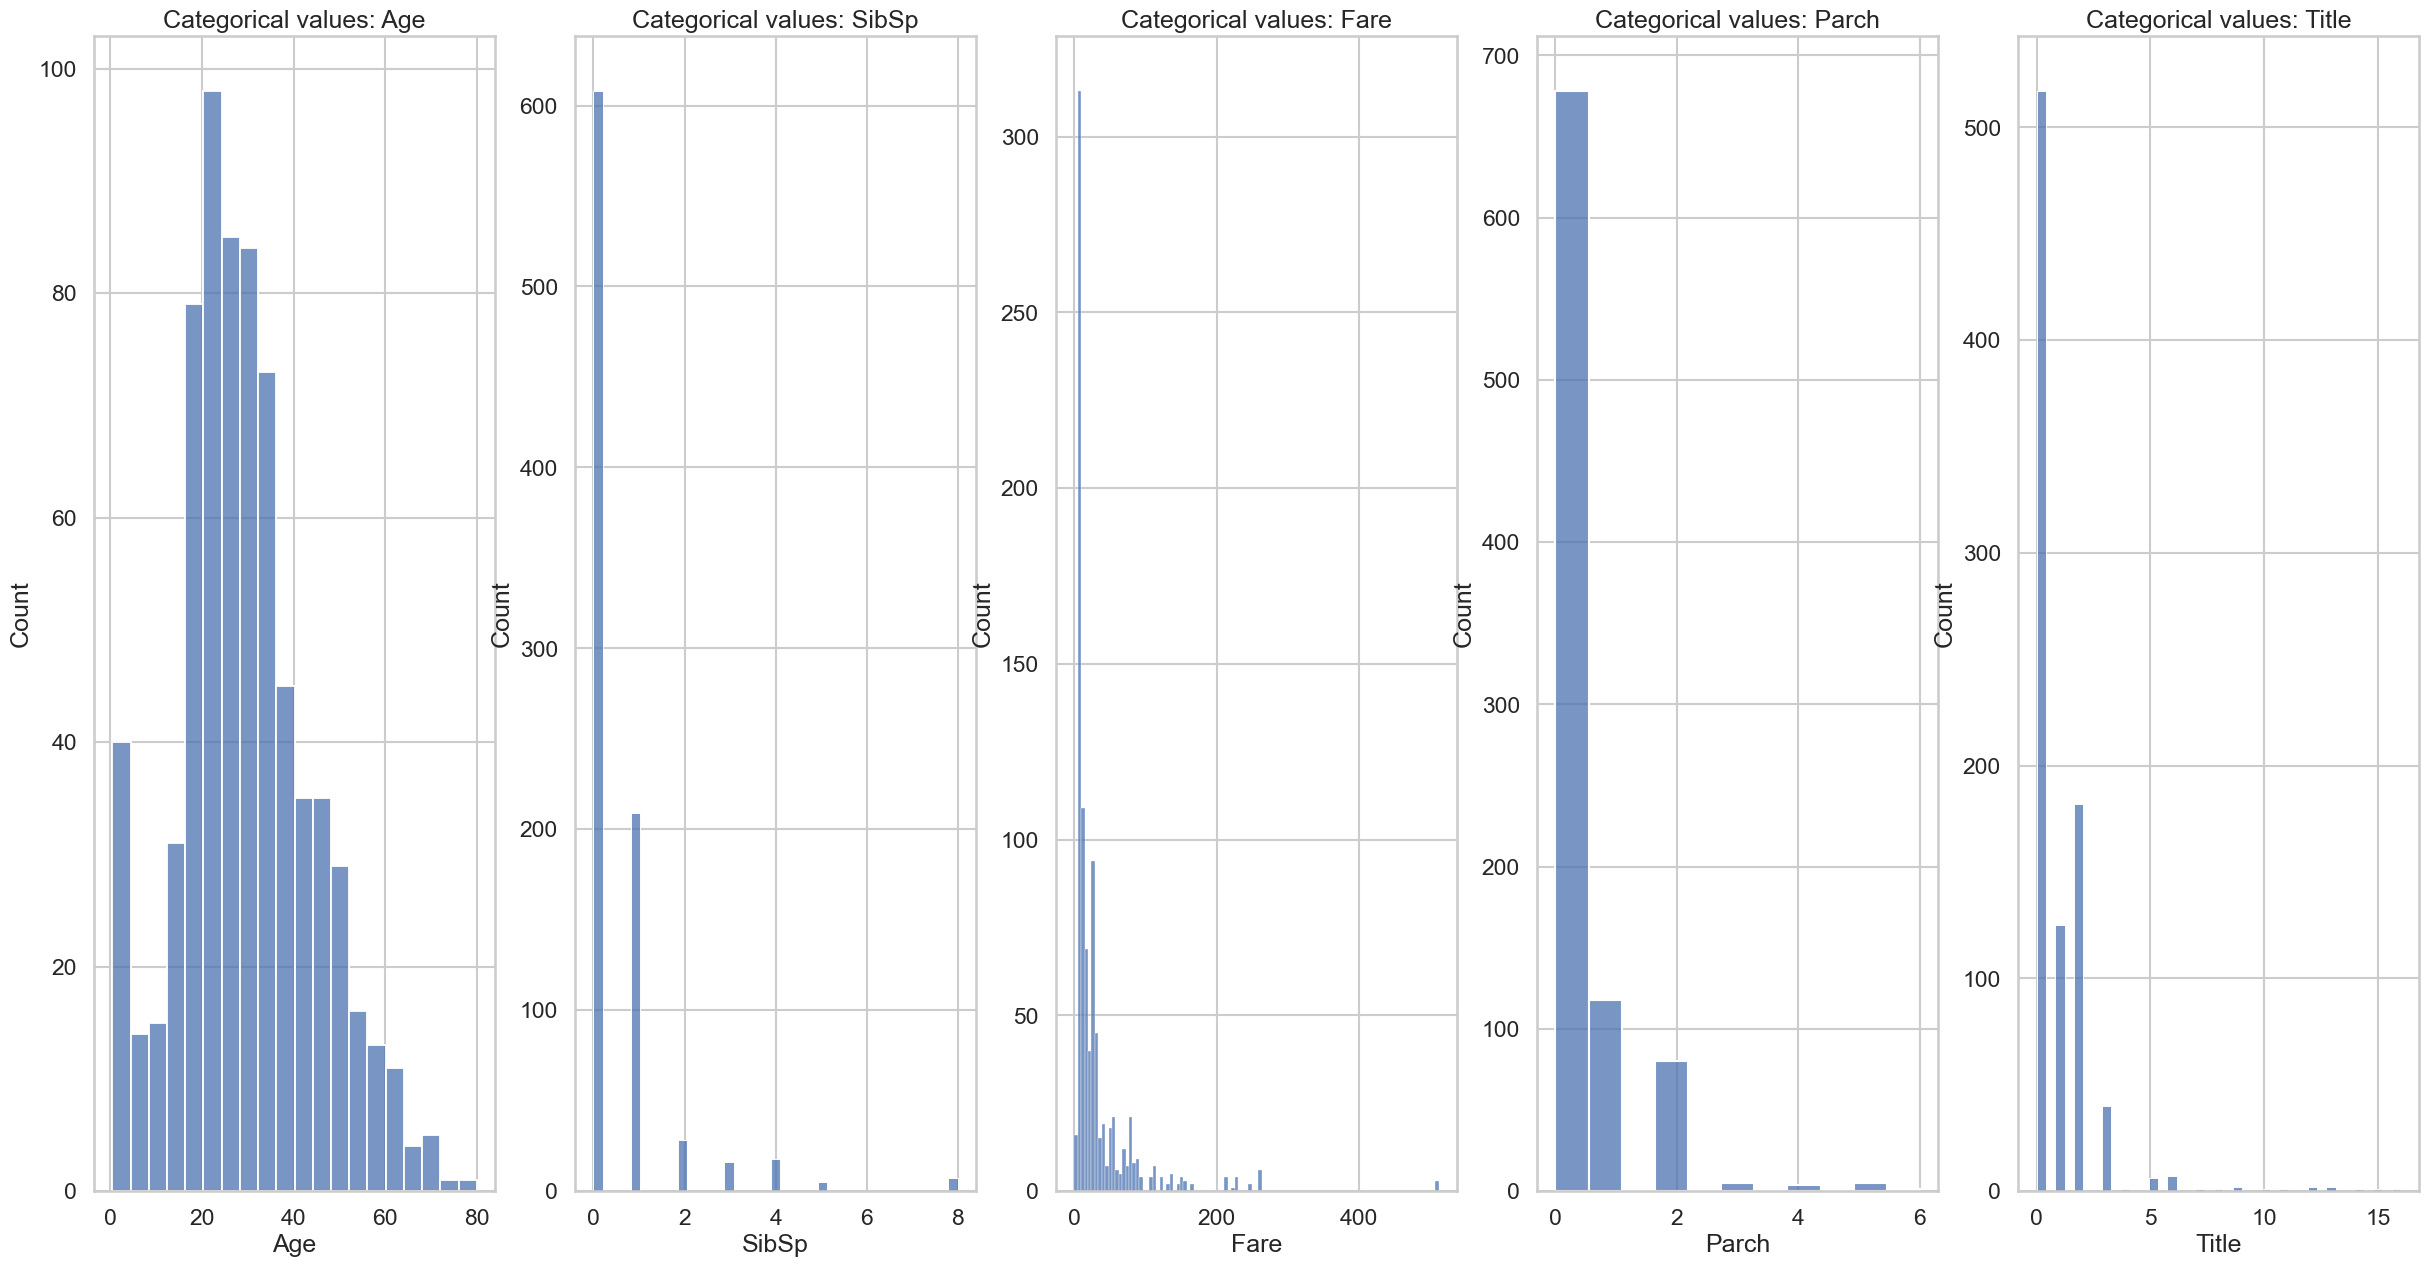

In [49]:
numbers = ['Age', 'SibSp', 'Fare', 'Parch', 'Title']
plt.figure(figsize=(30, 15))
for i, var in enumerate(numbers, 1):
    plt.subplot(1, len(numbers), i)
    sns.histplot(dataset[var])
    plt.title(f'Categorical values: {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
plt.show()

Ваші висновки:

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

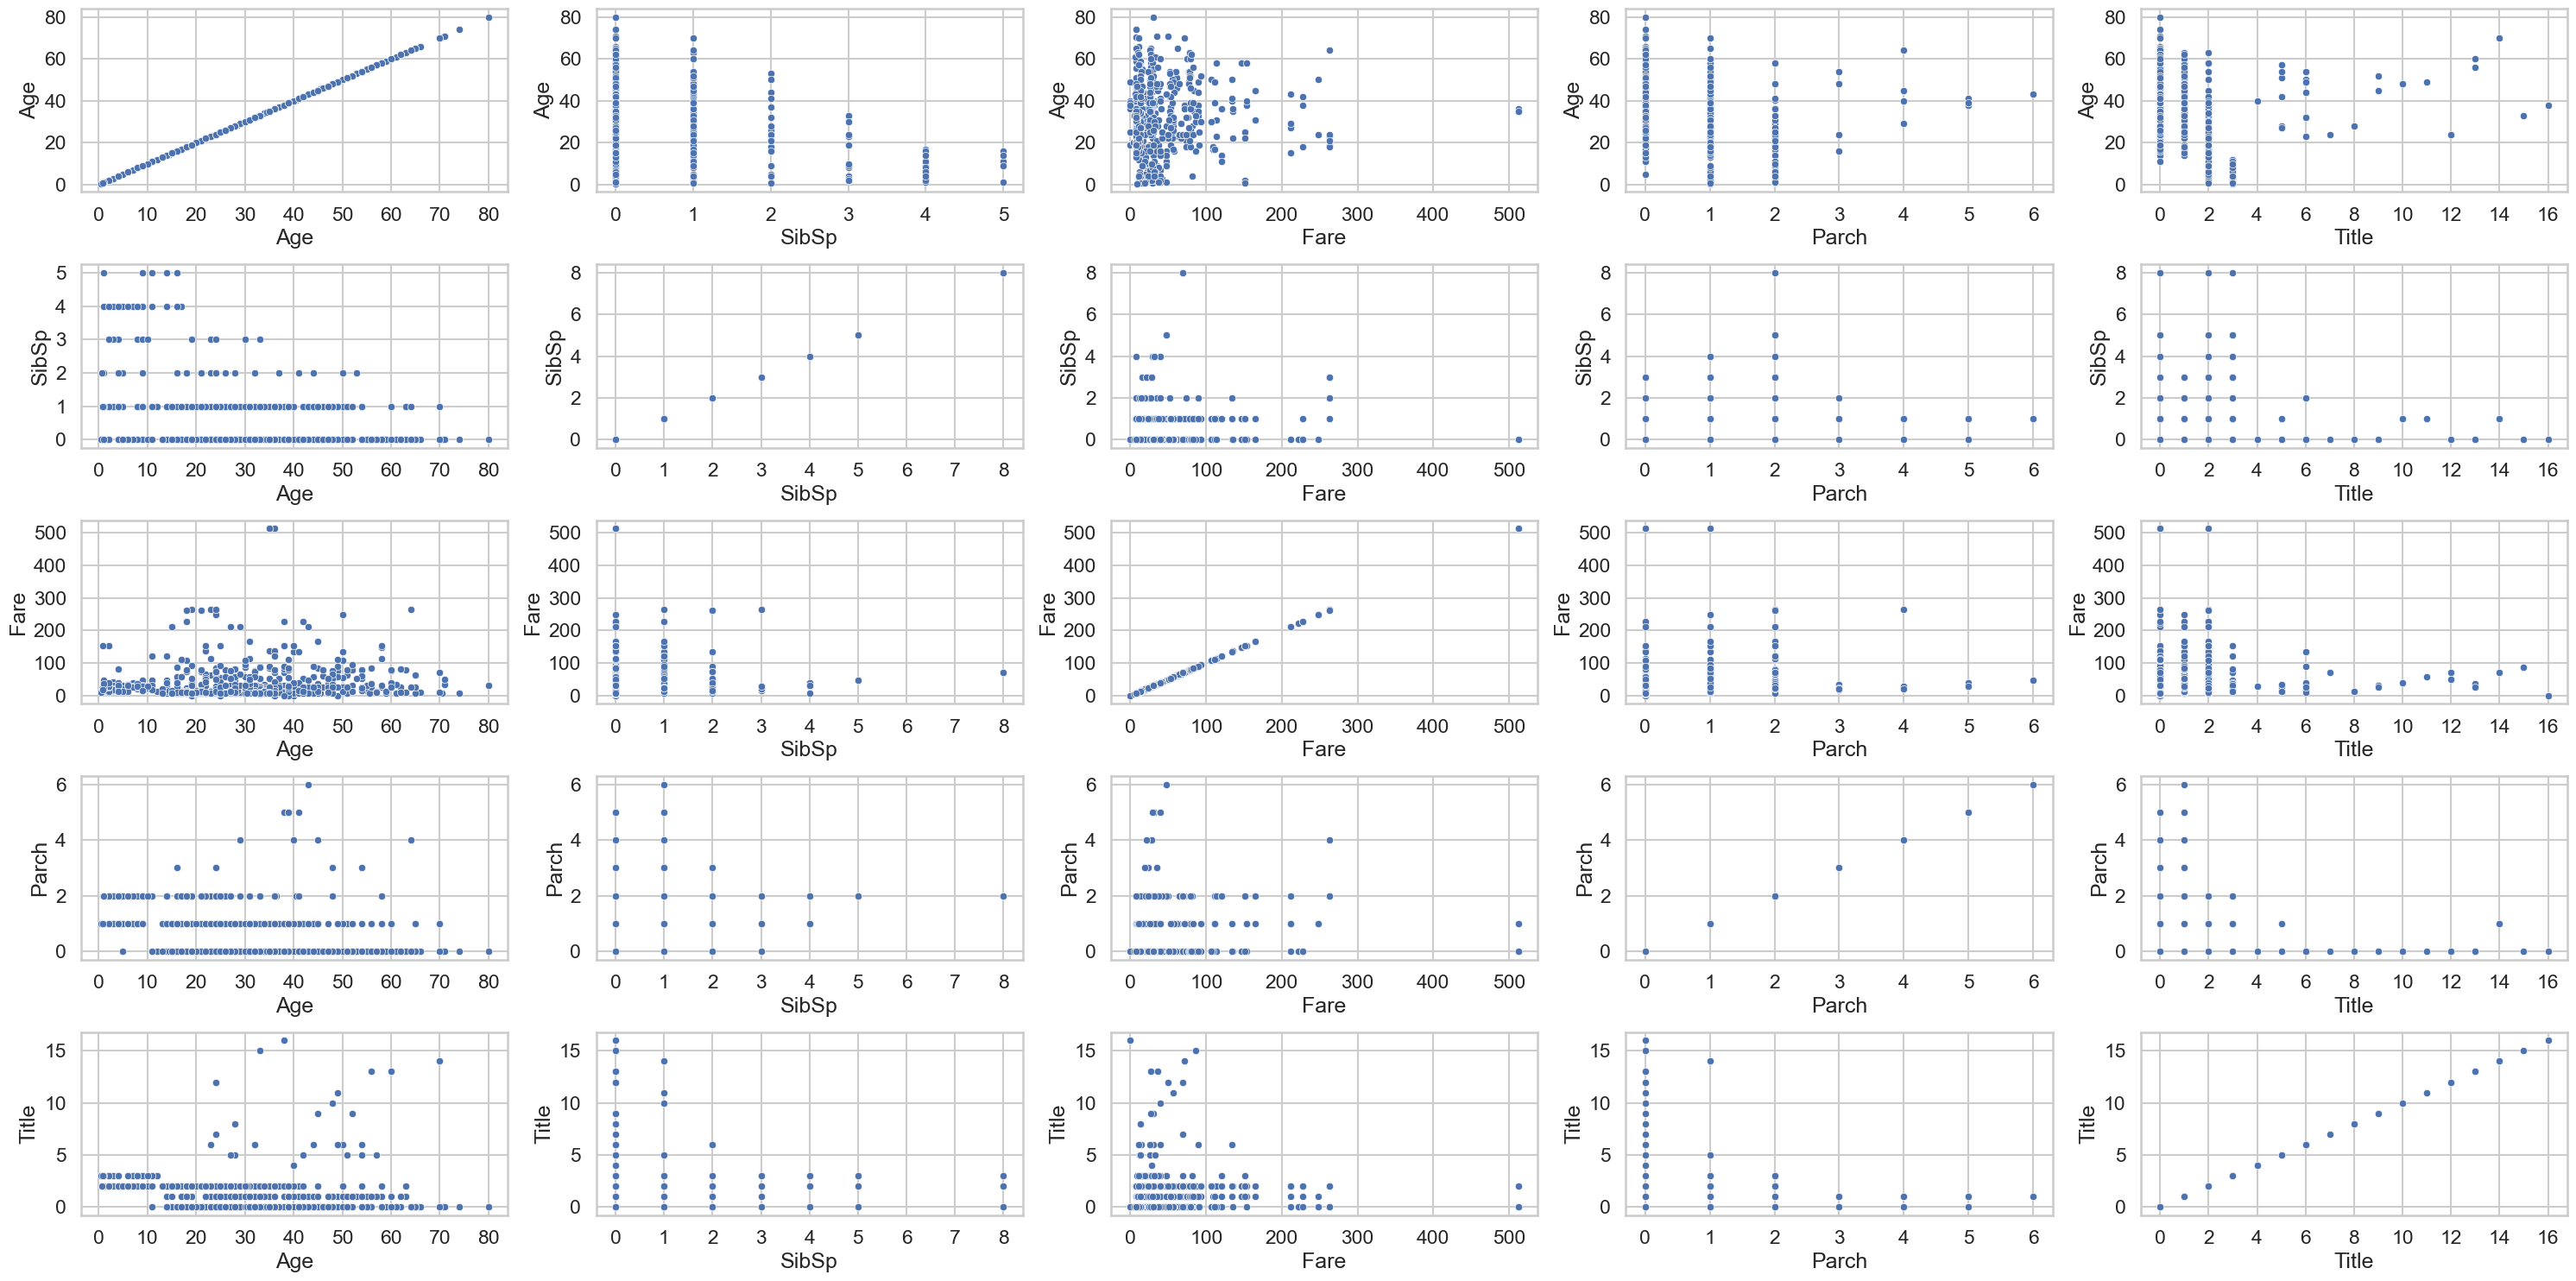

In [50]:
numbers = ['Age', 'SibSp', 'Fare', 'Parch', 'Title']
fig, ax = plt.subplots(nrows=len(numbers), ncols=len(numbers), figsize=(30, 15))
sns.set(style="whitegrid")

for i, variable_row in enumerate(numbers):
    for j, variable_col in enumerate(numbers):
        sns.scatterplot(x=variable_col, y=variable_row, data=dataset, ax=ax[i, j])

plt.tight_layout()
plt.show()

Ваші висновки:
На цих графіках можна побачити звязок  між всіма чисельними змінними

**Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.**